In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
!pwd

/home/isha/Desktop/AU/Work_Done/Wave_Dark_Matter/Numerical_Solutions


In [65]:
output_path = "/home/isha/Desktop/AU/Work_Done/Wave_Dark_Matter/Numerical_Solutions/ODE/"

# Simple Harmonic Oscillator (Initial Value Problem)

In this Jupyter notebook, SHO is studied as an initial value problem using the following methods:
- Euler 
- Modified Euler
- RK2
- RK4
- Leapfrog

### Some details

The differential equation for SHO is given as: 
\begin{equation}
\ddot{x} = - \omega^{2} x
\end{equation}

The above can be written as 2 linear first order ODE as 
\begin{equation}
\dot{x} = v \& \dot{v} = - \omega^{2} x
\end{equation}

We need to study the time evolution of this SHO i.e., we integrate the equations of motion and find 'x' and see how the energy of the SHO evolves.

Analytically, we know that the total energy of the SHO is given as:
\begin{equation}
E = \frac{mv^{2}}{2} + \frac {m \omega^{2}x^{2}}{2}
\end{equation}

In [66]:
#Initial conditions and constants
x_ini = 1
v_ini = 0

omega = 1
dt = 0.1
nsteps = 1000
m = 1

### Define functions for time evolution and energy calculation of SHO using different methods

In [67]:
#Euler method
def sho_euler(x_ini_val, v_ini_val, omega_val, dt_val, nsteps_val):
    x = []
    v = []
    t = []

    x.append(x_ini_val)
    v.append(v_ini_val)
    t.append(0)

    for i in range(nsteps_val - 1):
        x_new = x[i] + v[i] * dt_val
        v_new = v[i] - omega_val**2 * x[i] * dt_val
        t_new = t[i] + dt_val

        x.append(x_new)
        v.append(v_new)
        t.append(t_new)

    #print(f't:{t} | x:{x} | v:{v}')
    return pd.DataFrame({'Time': t, 'Position': x, 'Velocity': v})


In [68]:
#Modified Euler
def sho_modified_euler(x_ini_val, v_ini_val, omega_val, dt_val, nsteps_val):
    x = []
    v = []
    t = []

    x.append(x_ini_val)
    v.append(v_ini_val)
    t.append(0)

    for i in range(nsteps_val - 1):
        #Predicted from Euler method
        x_new = x[i] + v[i] * dt_val
        v_new = v[i] - omega_val**2 * x[i] * dt_val

        #Corrected
        x_new_corr = x_new + (1/2) * dt_val * (v_new + v[i]) 
        v_new_corr = v_new - (1/2) * (omega_val **2) * (x_new + x[i])   

        t_new = t[i] + dt_val

        x.append(x_new_corr)
        v.append(v_new_corr)
        t.append(t_new)   

    #print(f't:{t} | x:{x} | v:{v}')
    return pd.DataFrame({'Time': t, 'Position': x, 'Velocity': v})

#RK2
def sho_rk2(x_ini_val, v_ini_val, omega_val, dt_val, nsteps_val):
    x = []
    v = []
    t = []

    x.append(x_ini_val)
    v.append(v_ini_val)
    t.append(0)

    for i in range(nsteps_val - 1):
        #Predicted from Euler method
        x_new = x[i] + v[i] * dt_val
        v_new = v[i] - omega_val**2 * x[i] * dt_val

        #Corrected
        x_new_corr = x_new + (1/2) * dt_val * (v_new + v[i]) 
        v_new_corr = v_new - (1/2) * (omega_val **2) * (x_new + x[i])   

        t_new = t[i] + dt_val

        x.append(x_new_corr)
        v.append(v_new_corr)
        t.append(t_new)   

    #print(f't:{t} | x:{x} | v:{v}')
    return pd.DataFrame({'Time': t, 'Position': x, 'Velocity': v})


In [73]:
#RK4
def sho_rk4(x_ini_val, v_ini_val, omega_val, dt_val, nsteps_val):
    x = []
    v = []
    t = []

    x.append(x_ini_val)
    v.append(v_ini_val)
    t.append(0)

    for i in range(nsteps_val - 1):
        k1x = v[i]
        k1v = - (omega_val ** 2) * x[i]

        k2x = v[i] + (1/2) * (omega_val**2) * dt_val * k1v
        k2v = - (omega_val**2) * (x[i] + (1/2) * dt_val * k1x)

        k3x = v[i] + (1/2) * dt_val * k2v
        k3v = - (omega_val**2) * (x[i] + (1/2) * dt_val * k2x)

        k4x = v[i] + (1/2) * dt_val * k3v
        k4v = - (omega_val**2) * (x[i] + dt_val * k3x)

        x_new = x[i] + (dt_val/6) * (k1x + 2*k2x + 2*k3x + k4x)
        v_new = v[i] + (dt_val/6) * (k1v + 2*k2v + 2*k3v + k4v)


        t_new = t[i] + dt_val

        x.append(x_new)
        v.append(v_new)
        t.append(t_new)   

    #print(f't:{t} | x:{x} | v:{v}')
    return pd.DataFrame({'Time': t, 'Position': x, 'Velocity': v})


In [74]:
#Leapfrog method
def sho_leapfrog(x_ini_val, v_ini_val, omega_val, dt_val, nsteps_val):
    x = []
    v = []
    t = []

    x.append(x_ini_val)
    v_half = v_ini_val - 0.5 * omega_val**2 * x_ini_val * dt_val    #v_n+1/2 Initialize
    v.append(v_half)
    t.append(0)

    for i in range(nsteps_val - 1):
        x_new = x[i] + v_half * dt_val     #Position update
        v_new_half = v_half - omega_val**2 * x_new * dt_val    #v_n Velocity update
        t_new = t[i] + dt_val
        v_full = v_new_half + 0.5 * omega_val**2 * x_new * dt_val   #Full step velocity

        x.append(x_new)
        v.append(v_full)  #Storing full step velocity
        #v.append(v_new_half)   #Storing half-step velocity
        t.append(t_new)

        v_half = v_new_half

    #print(f't:{t} | x:{x} | v:{v}')
    return pd.DataFrame({'Time': t, 'Position': x, 'Velocity': v})

In [75]:
def sho_energy(x_val, v_val, m_val, omega_val):
    E = 0.5 * m_val * v_val**2 + 0.5 * m_val * omega_val**2 * x_val**2
    return E

In [76]:
#Euler
df_e_df = sho_euler(x_ini, v_ini, omega, dt, nsteps).to_csv(output_path + "SHO_Euler.csv", index=False)
df_e  = pd.read_csv(output_path + "SHO_Euler.csv")

#Modified Euler/RK2
df_me_df = sho_modified_euler(x_ini, v_ini, omega, dt, nsteps).to_csv(output_path + "SHO_Modified_Euler.csv", index=False)
df_me  = pd.read_csv(output_path + "SHO_Modified_Euler.csv")

#RK4
df_rk4_df = sho_rk4(x_ini, v_ini, omega, dt, nsteps).to_csv(output_path + "SHO_RK4.csv", index=False)
df_rk4  = pd.read_csv(output_path + "SHO_RK4.csv")

# Leapfrog
df_l_df = sho_leapfrog(x_ini, v_ini, omega, dt, nsteps).to_csv(output_path + "SHO_Leapfrog.csv", index=False)
df_l  = pd.read_csv(output_path + "SHO_Leapfrog.csv")

In [ ]:
#df_e, df_me

(     Time   Position    Velocity
 0     0.0   1.000000    0.000000
 1     0.1   1.000000   -0.100000
 2     0.2   0.990000   -0.200000
 3     0.3   0.970000   -0.299000
 4     0.4   0.940100   -0.396000
 ..    ...        ...         ...
 995  99.5  29.457267  138.109329
 996  99.6  43.268200  135.163603
 997  99.7  56.784560  130.836783
 998  99.8  69.868238  125.158327
 999  99.9  82.384071  118.171503
 
 [1000 rows x 3 columns],
      Time      Position      Velocity
 0     0.0  1.000000e+00  0.000000e+00
 1     0.1  9.950000e-01 -1.100000e+00
 2     0.2  7.700250e-01 -2.139500e+00
 3     0.3  3.382749e-01 -2.879552e+00
 4     0.4 -2.393270e-01 -3.107677e+00
 ..    ...           ...           ...
 995  99.5  9.479101e+32 -1.444393e+33
 996  99.6  6.542919e+32 -2.414875e+33
 997  99.7  1.680455e+32 -3.013852e+33
 998  99.8 -4.355652e+32 -3.048009e+33
 999  99.9 -1.042989e+33 -2.416487e+33
 
 [1000 rows x 3 columns])

### Energy vs Time

In [78]:
#Energy
E_e = sho_energy(df_e['Position'], df_e['Velocity'], m, omega)
E_me = sho_energy(df_me['Position'], df_me['Velocity'], m, omega)
E_rk4 = sho_energy(df_rk4['Position'], df_rk4['Velocity'], m, omega)
E_l = sho_energy(df_l['Position'], df_l['Velocity'], m, omega)

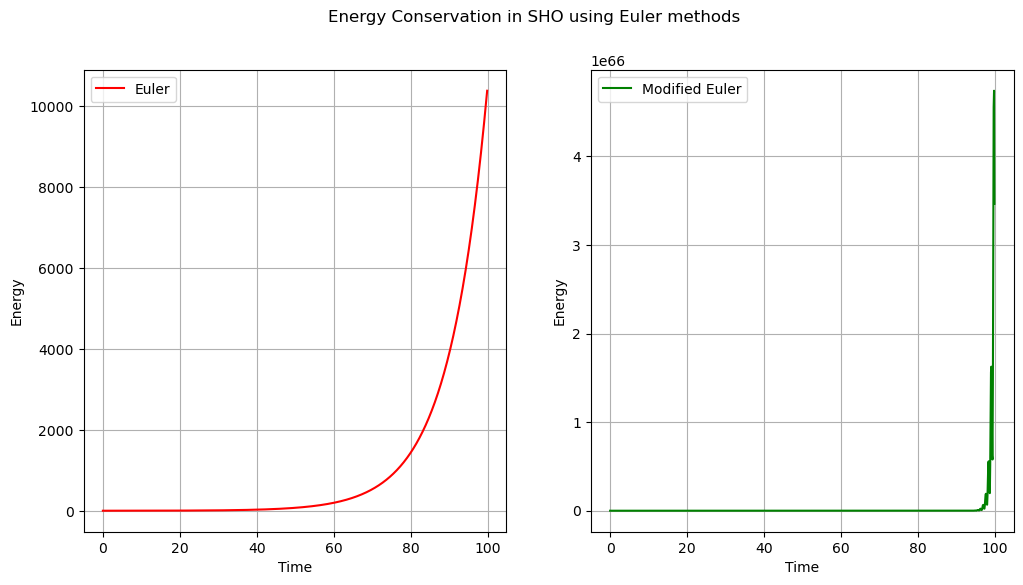

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(df_e['Time'], E_e, label='Euler', color='red')
ax[1].plot(df_me['Time'], E_me, label='Modified Euler', color='green')

for i in ax:
    i.set_xlabel('Time')
    i.set_ylabel('Energy')
    i.legend()
    i.grid(True)
plt.suptitle("Energy Conservation in SHO using Euler methods")
plt.show()

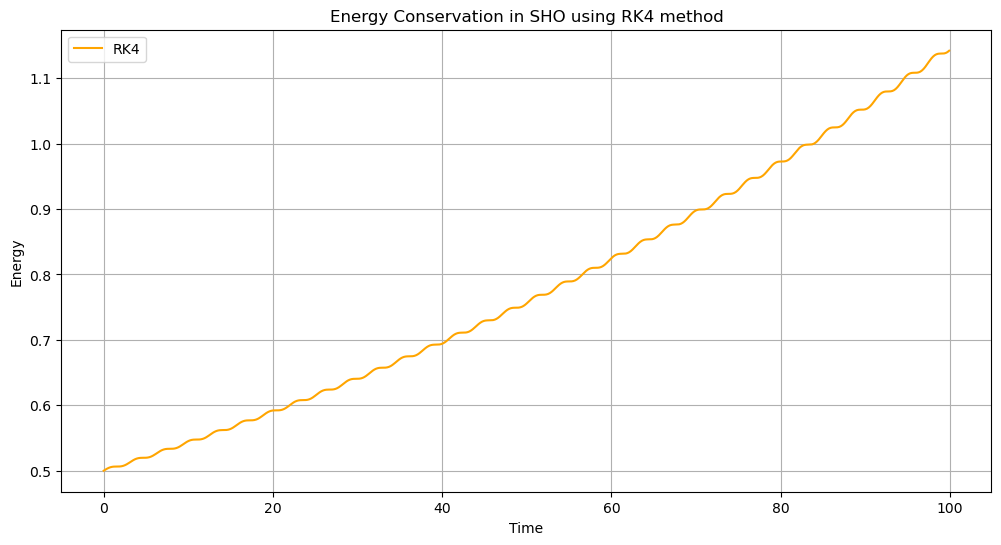

In [81]:
plt.figure(figsize=(12, 6))
#plt.plot(df_e['Time'], E_e, label='RK4', color='red')
plt.plot(df_rk4['Time'], E_rk4, label='RK4', color='orange')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation in SHO using RK4 method')
plt.legend()
plt.grid()
plt.show()

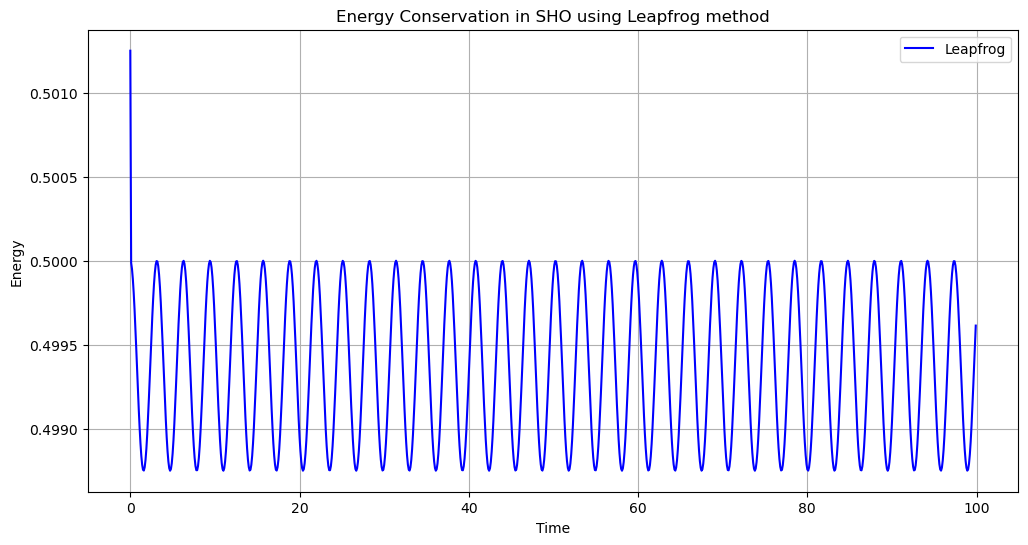

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(df_e['Time'], E_e, label='Euler', color='red')
plt.plot(df_l['Time'], E_l, label='Leapfrog', color='blue')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation in SHO using Leapfrog method')
plt.legend()
plt.grid()
plt.show()

### Position vs Time

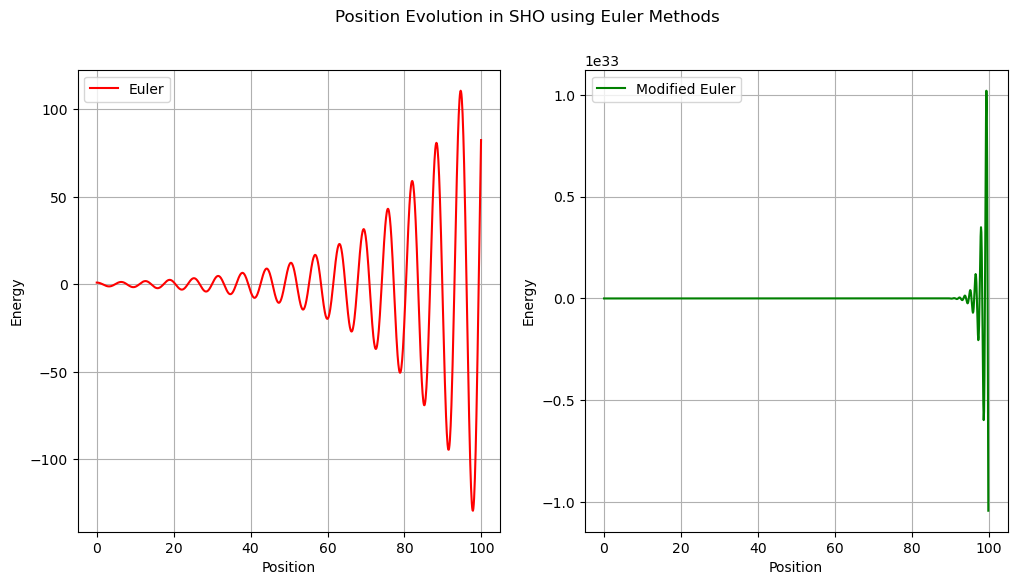

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(df_e['Time'], df_e['Position'], label='Euler', color='red')
ax[1].plot(df_me['Time'], df_me['Position'], label='Modified Euler', color='green')

for i in ax:
    i.set_xlabel('Position')
    i.set_ylabel('Energy')
    i.legend()
    i.grid(True)

plt.suptitle('Position Evolution in SHO using Euler Methods')
plt.show()

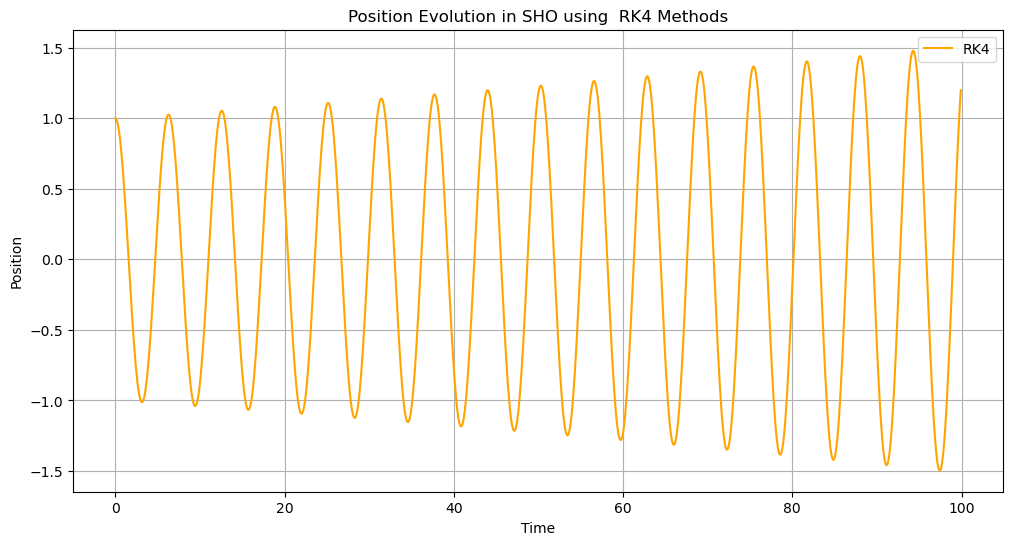

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(df_rk4['Time'], df_rk4['Position'], label='RK4', color='orange')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position Evolution in SHO using  RK4 Methods')
plt.legend()
plt.grid()
plt.show()

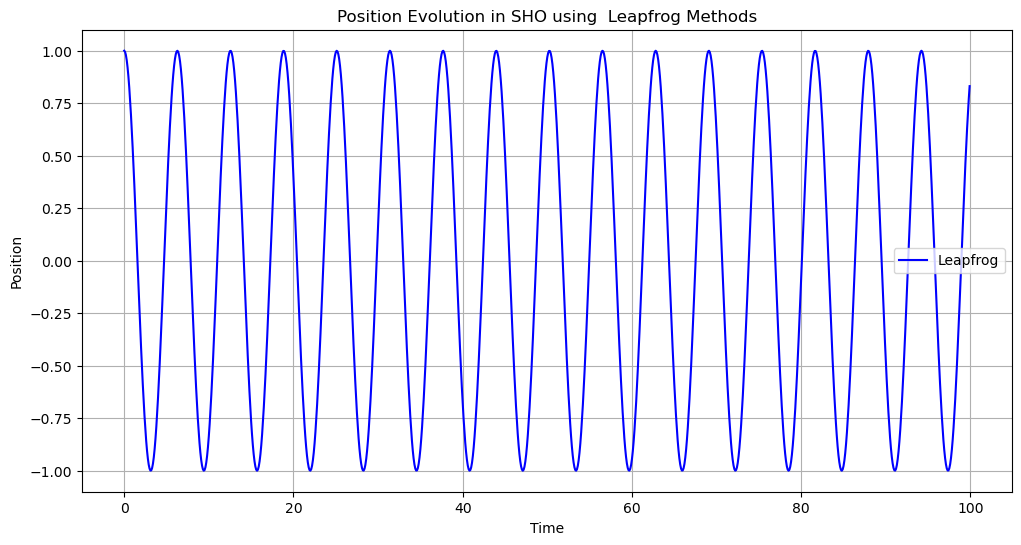

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_l['Time'], df_l['Position'], label='Leapfrog', color='blue')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position Evolution in SHO using  Leapfrog Methods')
plt.legend()
plt.grid()
plt.show()

### Phase Space

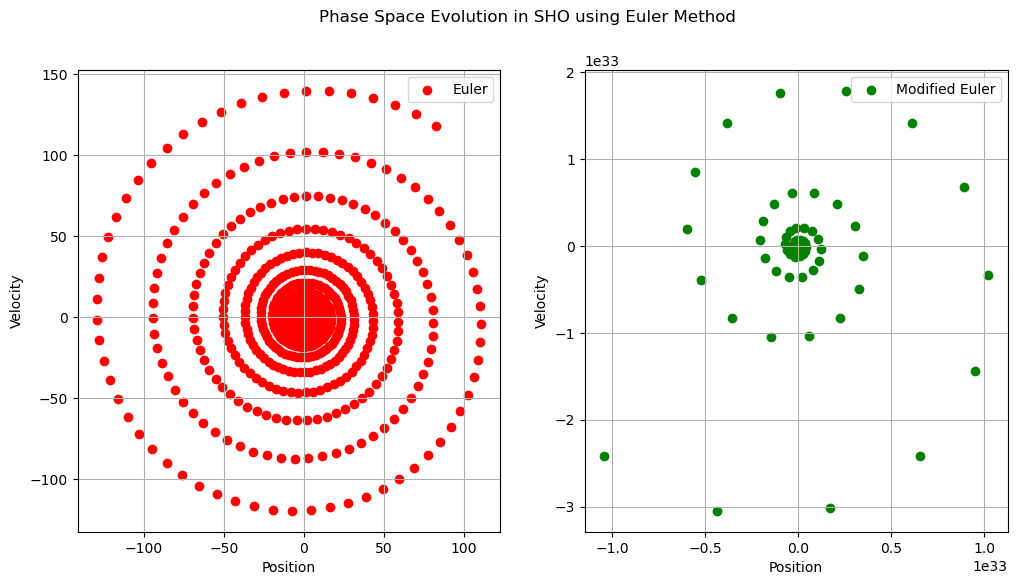

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter( df_e['Position'], df_e['Velocity'], label='Euler', color='red')
ax[1].scatter(df_me['Position'], df_me['Velocity'], label='Modified Euler', color='green')
for i in ax:
    i.set_xlabel('Position')
    i.set_ylabel('Velocity')
    i.legend()
    i.grid(True)

plt.suptitle('Phase Space Evolution in SHO using Euler Method')
plt.show()


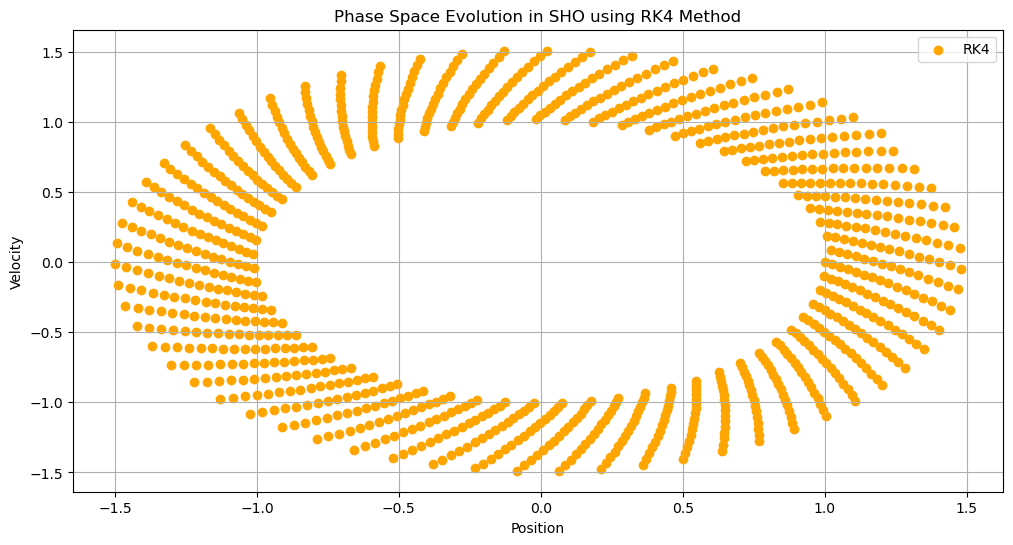

In [85]:
plt.figure(figsize=(12, 6))
#plt.scatter( df_e['Position'], df_e['Velocity'], label='Euler', color='red')
plt.scatter(df_rk4['Position'], df_rk4['Velocity'], label='RK4', color='orange')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space Evolution in SHO using RK4 Method')
plt.legend()
plt.grid()
plt.show()

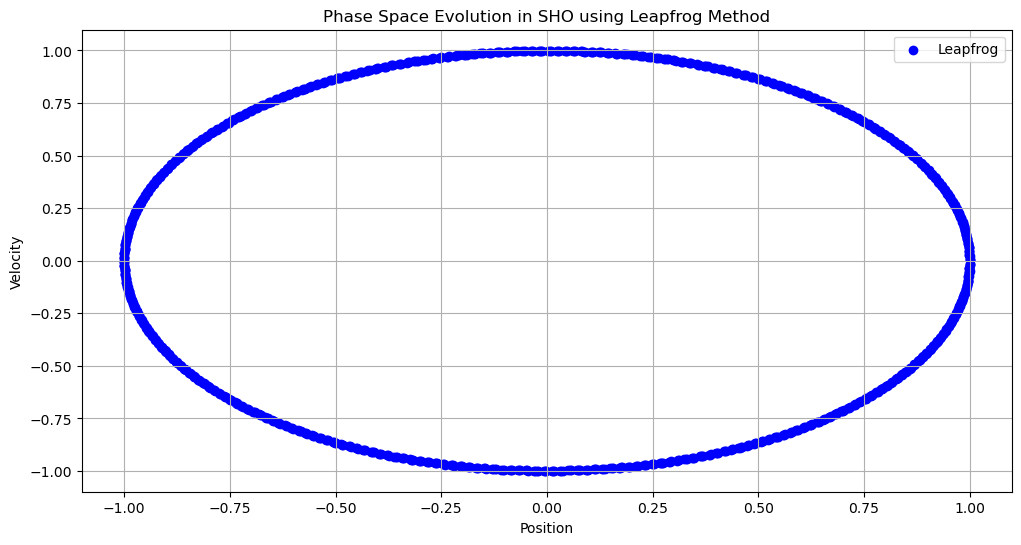

In [ ]:
plt.figure(figsize=(12, 6))
#plt.scatter( df_e['Position'], df_e['Velocity'], label='Euler', color='red')
plt.scatter(df_l['Position'], df_l['Velocity'], label='Leapfrog', color='blue')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space Evolution in SHO using Leapfrog Method')
plt.legend()
plt.grid()
plt.show()